#Script Objective and Work Plan

##Objective:

Create a Python script that allows users to visualize geospatial data with a bigger overview and a zoomed-in inset of a specific part. For example, in this code, display rivers across the USA and zoom into Tennessee for a detailed view. This helps users explore geographic data intuitively.

##Work Plan

1. Understand the Problem:

- We are now working exclusively with shapefiles (.shp and .SHP).
- The data might not be well visualized initially, especially if boundaries and features overlap or aren't properly styled.
- Users need both a broad overview (e.g., all rivers in the USA) and a zoomed-in, detailed view of a specific region (e.g., Tennessee).

2. Assumptions:

- The shapefiles are valid and compatible (same CRS/projection).
- The main map (e.g., rivers) and the inset (e.g., states) are from different shapefiles.
- Regions are filtered by a column like STATE_NAME, and the user knows how the region is labeled (case-insensitive, e.g., "Tennessee").
- Users may not need advanced customizations but want clear, practical outputs.

3. Immediate Challenges:

- Ensuring inset maps are zoomed properly while maintaining context in the main map.
- Making the visuals intuitive and not cluttered.
- Handling errors like missing shapefiles, invalid regions, or mismatched attributes.

4. Execution Steps:

- Start with a directory scan to list all shapefiles (consider both .shp and .SHP extensions).
- Let the user select the dataset for the main map and the region for the inset.
- Load and filter the data, ensuring proper alignment (e.g., CRS matching).
- Plot the main map for an overview, overlay the inset map with clear boundaries and a zoomed-in view of the chosen region.

In [56]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [57]:
gdb_path = r'C:\Users\zmrplaza\OneDrive - The University of Memphis\Classes\Adv. GIS\Archivos\Oct24\USA'

In [104]:
# Function to list all feature classes in the geodatabase
def list_shapefiles(gdb_path):
    # Initialize an empty list to store shapefile paths
    shapefiles = []
    
    # Walk through the directory starting from the geodatabase path
    for root, dirs, files in os.walk(gdb_path):
        # Iterate over each file in the current directory
        for file in files:
            # Check if the file has a .shp extension (case insensitive)
            if file.lower().endswith('.shp'):  
                # Append the full path of the shapefile to the list
                shapefiles.append(os.path.join(root, file))
    
    # Return the list of shapefile paths
    return shapefiles

In [82]:
# List the feature classes and display them with numbering
shapefiles = list_shapefiles(gdb_path)  # Retrieve a list of shapefiles from the specified geodatabase path
print('Available Shapefiles:')  # Print a header for the list of shapefiles
# Enumerate through the list of shapefiles, starting the index at 1 for user-friendly numbering
for idx, shp in enumerate(shapefiles, start=1):
    # Print the index and the base name of each shapefile
    print(f'{idx}: {os.path.basename(shp)}')  # Display the numbered list of shapefiles

Available Shapefiles:
1: adi.shp
2: CITIES.SHP
3: COUNTIES.SHP
4: DRAINAGE.SHP
5: LAKES.SHP
6: places.shp
7: Rivers.shp
8: ROADS.SHP
9: ROADS_RT.SHP
10: STATES.SHP
11: zip_usa.shp


In [84]:
# Ask the user to choose the main shapefile to plot
# Prompt the user to enter a number corresponding to the desired shapefile for the main plot
main_choice = int(input("Enter the number of the shapefile for the main plot (e.g., If you want Rivers choose 7): ")) - 1

# Retrieve the selected shapefile from the list based on the user's choice
main_shapefile = shapefiles[main_choice]

Enter the number of the shapefile for the main plot (e.g., Rivers):  7


In [86]:
# Prompt the user to select a shapefile for the inset by displaying a message
# The user is expected to enter a number corresponding to the desired shapefile
inset_choice = int(input("Enter the number of the shapefile for the inset (e.g., If you want States choose 10): ")) - 1

# Retrieve the selected shapefile from the list of shapefiles using the user's choice
# The choice is adjusted by subtracting 1 to match the zero-based index of the list
inset_shapefile = shapefiles[inset_choice]

Enter the number of the shapefile for the inset (e.g., States):  10


In [94]:
# Load the selected shapefiles into GeoDataFrames
main_gdf = gpd.read_file(main_shapefile)  # Read the main shapefile and store it in main_gdf
inset_gdf = gpd.read_file(inset_shapefile)  # Read the inset shapefile and store it in inset_gdf

In [96]:
# Ask the user to specify a filter for the inset
inset_filter = input("Enter the state name for the inset (e.g., Tennessee): ")

Enter the state name for the inset (e.g., Tennessee):  Tennessee


In [98]:
# Filter the inset shapefile for the specified state
# Use the 'STATE_NAME' column to check if it contains the specified state name (inset_filter)
# The 'case=False' argument makes the search case-insensitive
# The 'na=False' argument ensures that NaN values are ignored in the filtering process
filtered_inset_gdf = inset_gdf[inset_gdf['STATE_NAME'].str.contains(inset_filter, case=False, na=False)]

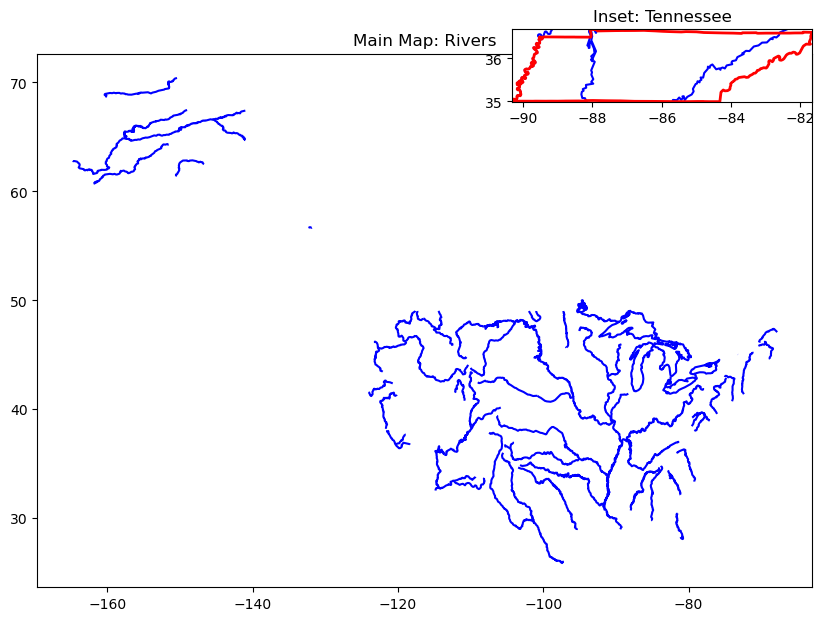

In [100]:
# Plot function
def plot_with_inset(main_gdf, filtered_inset_gdf):
    # Create the main plot with a specified figure size
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Plot the main geographical data (rivers) on the main axis
    main_gdf.plot(ax=ax, color='blue', edgecolor='black')
    # Set the title for the main plot
    ax.set_title("Main Map: Rivers")

    # Check if inset data is available
    if not filtered_inset_gdf.empty:
        # Add an inset axis to the figure at a specified position and size
        inset_ax = fig.add_axes([0.6, 0.6, 0.3, 0.3])  # Adjust position and size of the inset
        # Plot the main geographical data (rivers) in the inset
        main_gdf.plot(ax=inset_ax, color='blue', edgecolor='black')  
        # Highlight the filtered geographical features (Tennessee) in the inset
        filtered_inset_gdf.boundary.plot(ax=inset_ax, color='red', linewidth=2)  
       # Zoom inset to Tennessee
        xmin, ymin, xmax, ymax = filtered_inset_gdf.total_bounds
        inset_ax.set_xlim(xmin, xmax)
        inset_ax.set_ylim(ymin, ymax)
        inset_ax.set_title(f"Inset: {inset_filter}")
    else:
        # Print a message if no matching features are found for the inset
        print(f"No matching features found for {inset_filter} in the inset shapefile.")

    # Display the plot
    plt.show()

# Call the plot function
plot_with_inset(main_gdf, filtered_inset_gdf)

#Future Work Plan

1. Attribute Recognition and Selection:

- Implement an automatic detection system to list available attributes for filtering (e.g., display all columns like STATE_NAME) so the user doesn’t need prior knowledge of attribute names.
- Include functionality to preview unique attribute values (e.g., list all state names in the dataset) for easier region selection.
  
2. Dynamic Attribute Matching:

- Allow flexible filtering by matching partial attribute values (e.g., suggest "Tennessee" when the user types "Tenn").
- Add case-insensitivity and pattern recognition to reduce dependency on exact attribute names or spellings.

3. Multi-layer Insets:

- Enable the user to layer multiple datasets in the inset (e.g., rivers and highways within Tennessee).
- Include functionality to control which layers appear in the inset versus the main map.

4. Automatic Inset Region Suggestion:

- Add spatial queries to suggest regions for the inset based on proximity or overlap with a selected feature (e.g., "highlight the state containing this river").

5. Custom Inset Shapes and Sizes:

- Allow users to define the shape (e.g., square, circle) and size of the inset dynamically based on the selected region’s geometry.
- Ensure the inset adjusts to the spatial extent of the filtered region while maintaining clear boundaries.

6. Error Handling for Inset Regions:

- Automatically detect and notify the user if the selected region is missing or does not intersect the main map's features.

7. Seamless Attribute Linking:

- Enable cross-dataset linking, where the user can select a region from one dataset (e.g., states) and automatically filter features in another (e.g., rivers within Tennessee).

8. Streamlined User Input:

- Minimize user input by pre-populating options based on dataset metadata and providing dropdown selections instead of requiring text input.